II. Programming [9v]

Consider the diabetes.arff data available at the homework tab, comprising 8 biological features to classify 768 patients into 2 classes (normal, diabetes).

1) [1v] ANOVA is a statistical test that can be used to assess the discriminative power of a single input variable. Using f_classif from sklearn, identify the input variables with the worst and best discriminative power. Plot their class-conditional probability density functions.

Input variables with the best discriminative power. Glucose
Input variable with the worst discriminative power: BloodPressure


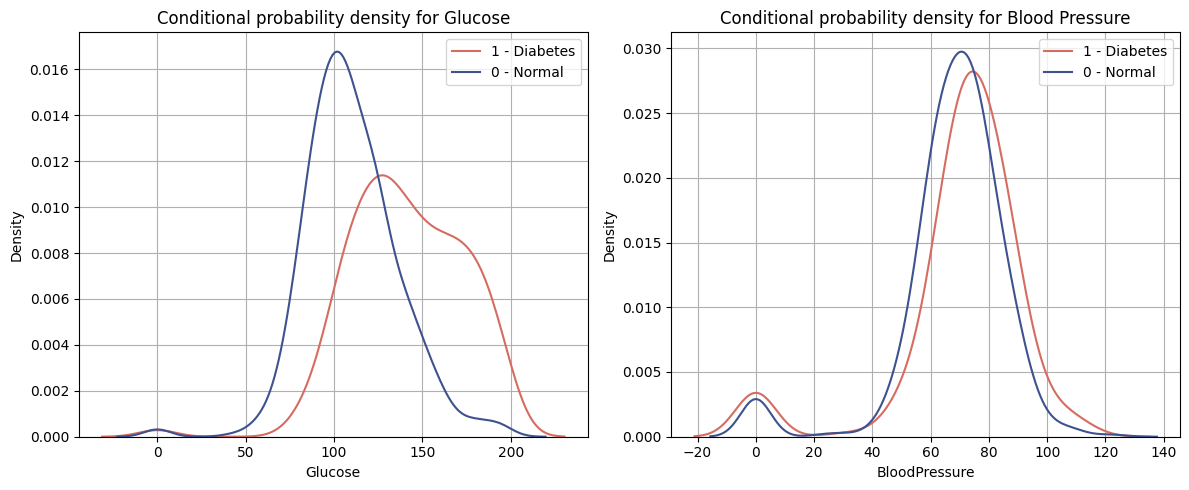

In [11]:
from scipy.io import arff
import pandas as pd
import numpy as np
from sklearn.feature_selection import f_classif
import matplotlib.pyplot as plt
import seaborn as sns

data, meta = arff.loadarff('diabetes.arff')
diabetes_df = pd.DataFrame(data)

X = diabetes_df.drop('Outcome', axis=1)
y =  diabetes_df['Outcome']
f_statistic, p_values = f_classif(X, y)

Min = min(f_statistic)
Max = max(f_statistic)

name_col_max = diabetes_df.columns[np.where(f_statistic == max(f_statistic))]
name_col_min = diabetes_df.columns[np.where(f_statistic == min(f_statistic))]

print('Input variables with the best discriminative power.',name_col_max[0])
print('Input variable with the worst discriminative power:', name_col_min[0])

#plot class-conditional probability density functions
fig, ax = plt.subplots(1, 2, figsize=(12, 5))  

# Plot 1: Conditional probability density for Glucose
subset_1 = diabetes_df[diabetes_df['Outcome'] == b'1']
subset_0 = diabetes_df[diabetes_df['Outcome'] == b'0']
sns.kdeplot(subset_1[name_col_max[0]], label='1 - Diabetes', color='#D66C61', ax=ax[0])
sns.kdeplot(subset_0[name_col_max[0]], label='0 - Normal', color='#3D528F', ax=ax[0])
ax[0].set_title('Conditional probability density for Glucose')
ax[0].grid(True)
ax[0].legend()

# Plot 2: Conditional probability density for Blood Pressure
sns.kdeplot(subset_1[name_col_min[0]], label='1 - Diabetes', color='#D66C61', ax=ax[1])
sns.kdeplot(subset_0[name_col_min[0]], label='0 - Normal', color='#3D528F', ax=ax[1])
ax[1].set_title('Conditional probability density for Blood Pressure')
ax[1].grid(True)
ax[1].legend()

plt.tight_layout()  
plt.show()

2) [4v] Using a stratified 80-20 training-testing split with a fixed seed (random_state=1), assess in a single plot both the training and testing accuracies of a decision tree with minimum sample split in {2,5,10,20,30,50,100} and the remaining parameters as default.
[optional] Note that split thresholding of numeric variables in decision trees is non-deterministic in sklearn, hence you may opt to average the results using 10 runs per parameterization.

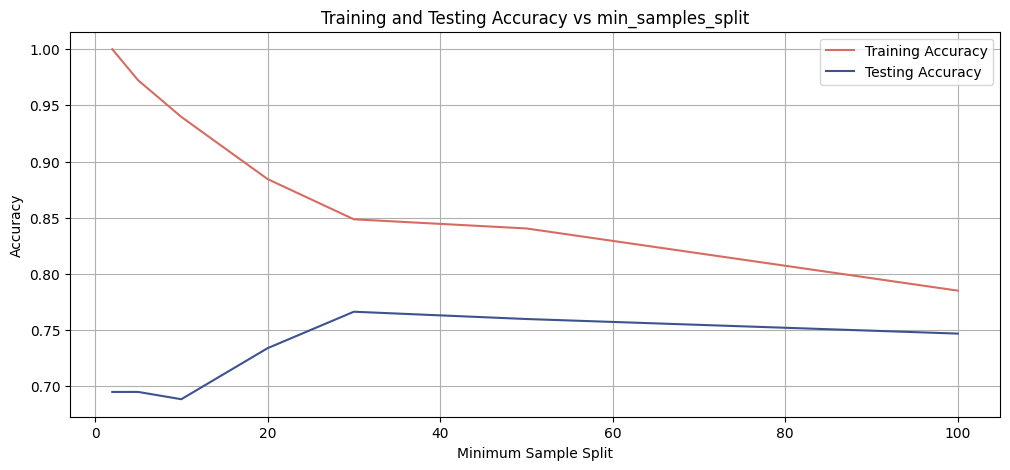

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from scipy.io.arff import loadarff

data = loadarff('diabetes.arff')
df = pd.DataFrame (data[0])
df['Outcome'] = df ['Outcome'].str.decode('utf-8')

X = df.drop('Outcome', axis=1) 
y = df['Outcome']  

min_splits  = [2, 5, 10, 20, 30, 50, 100]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 1, stratify = y)

train_accuracies = []
test_accuracies = []

# Loop over different values of min_samples_split stored in min_splits
for min_samples_split in min_splits:
    clf = DecisionTreeClassifier(min_samples_split=min_samples_split, random_state=1)
    
    clf.fit(X_train, y_train)
    
    train_accuracy = accuracy_score(y_train, clf.predict(X_train))
    train_accuracies.append(train_accuracy)

    test_accuracy = accuracy_score(y_test, clf.predict(X_test))
    test_accuracies.append(test_accuracy)

plt.figure(figsize=(12, 5))
plt.plot(min_splits, train_accuracies, label='Training Accuracy', color = '#D66C61')
plt.plot(min_splits, test_accuracies, label='Testing Accuracy', color = '#3D528F')
plt.xlabel('Minimum Sample Split')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy vs min_samples_split')
plt.legend()
plt.grid(True)
plt.show()

4) [2v] To deploy the predictor, a healthcare provider opted to learn a single decision tree (random_state=1) using all available data and ensuring that the maximum depth would be 3 in order to avoid overfitting risks.

i. Plot the decision tree.

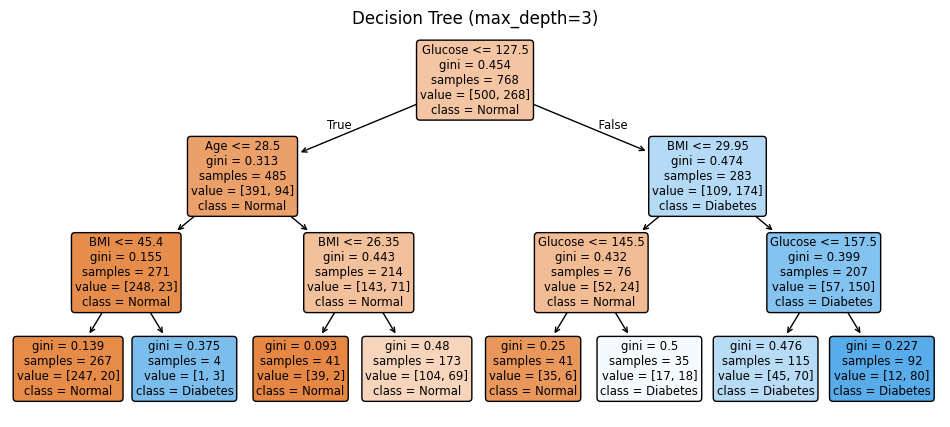

In [13]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
from scipy.io.arff import loadarff


data = loadarff('diabetes.arff')
df = pd.DataFrame (data[0])
df['Outcome'] = df ['Outcome'].str.decode('utf-8')

X = df.drop('Outcome', axis=1) 
y = df['Outcome']  

#Initialize a DecisionTreeClassifier with a maximum depth of 3 and a fixed random_state for reproducibility.
clf = DecisionTreeClassifier(max_depth=3, random_state=1)

#Train the DecisionTreeClassifier using the entire dataset (X and y)
clf.fit(X, y)

plt.figure(figsize=(12, 5))
tree.plot_tree(clf, feature_names=X.columns, class_names=['Normal', 'Diabetes'], filled=True, rounded=True)
plt.title('Decision Tree (max_depth=3)')
plt.show()